# Machine Learning vs. Traditional Programming Paradigm

### Key Difference:
- **Traditional Programming**: Requires explicit rules and logic to process data and produce outputs.
- **Machine Learning**: Learns patterns from data to make predictions or decisions without explicitly defined rules.

&rarr; Refer to today's discussion.

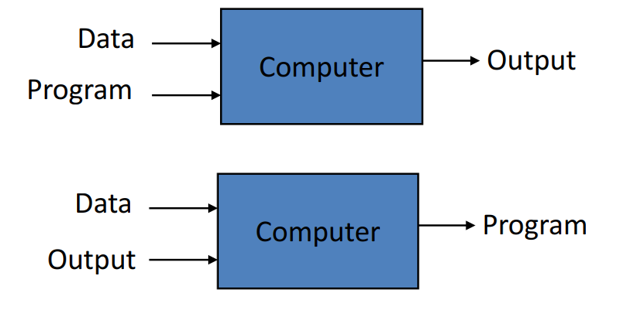

# Real life examples: Notes from text book 
### Use Case 1: Spam Filter – Traditional Approach

Requires manually identifying spam patterns (e.g., "4U", "credit card").

Write custom rules for each pattern.

Constantly update rules to keep up with spammers.

Becomes complex, hard to maintain.

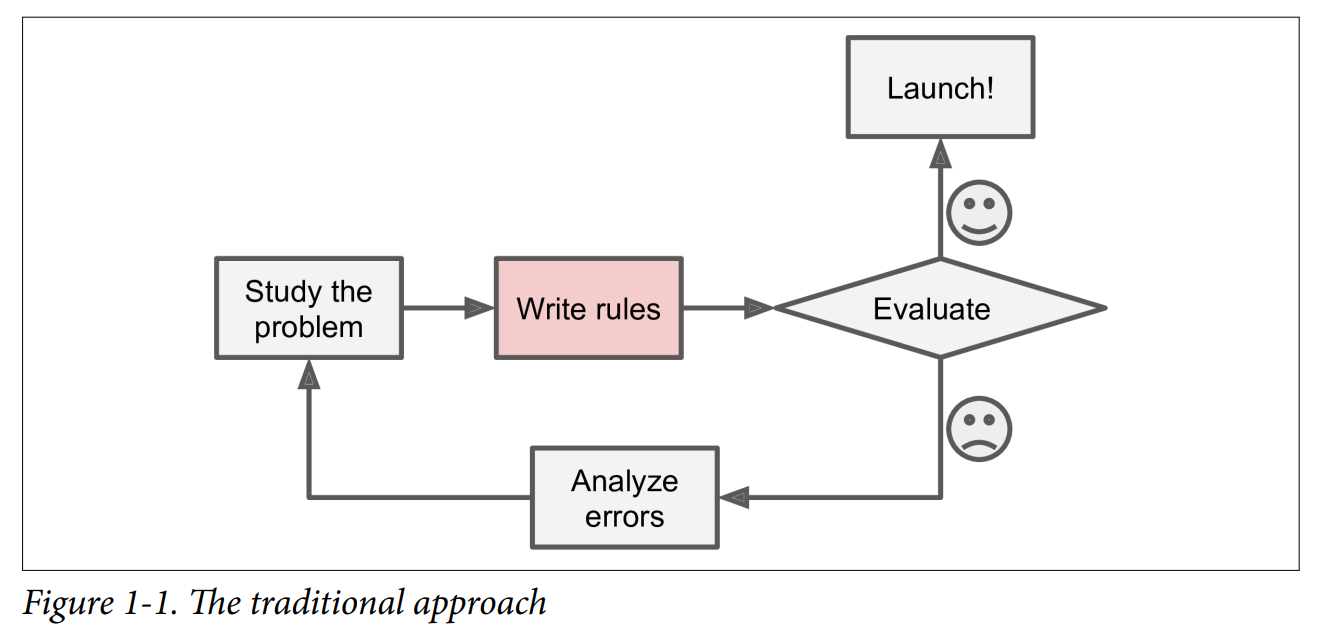


### Use Case 2: Spam Filter – Machine Learning Approach

Learns spam indicators automatically from data.

Shorter, easier-to-maintain code.

More accurate than manual rules.

Adapts to new spam patterns without human intervention (e.g., detects "For U" after "4U").

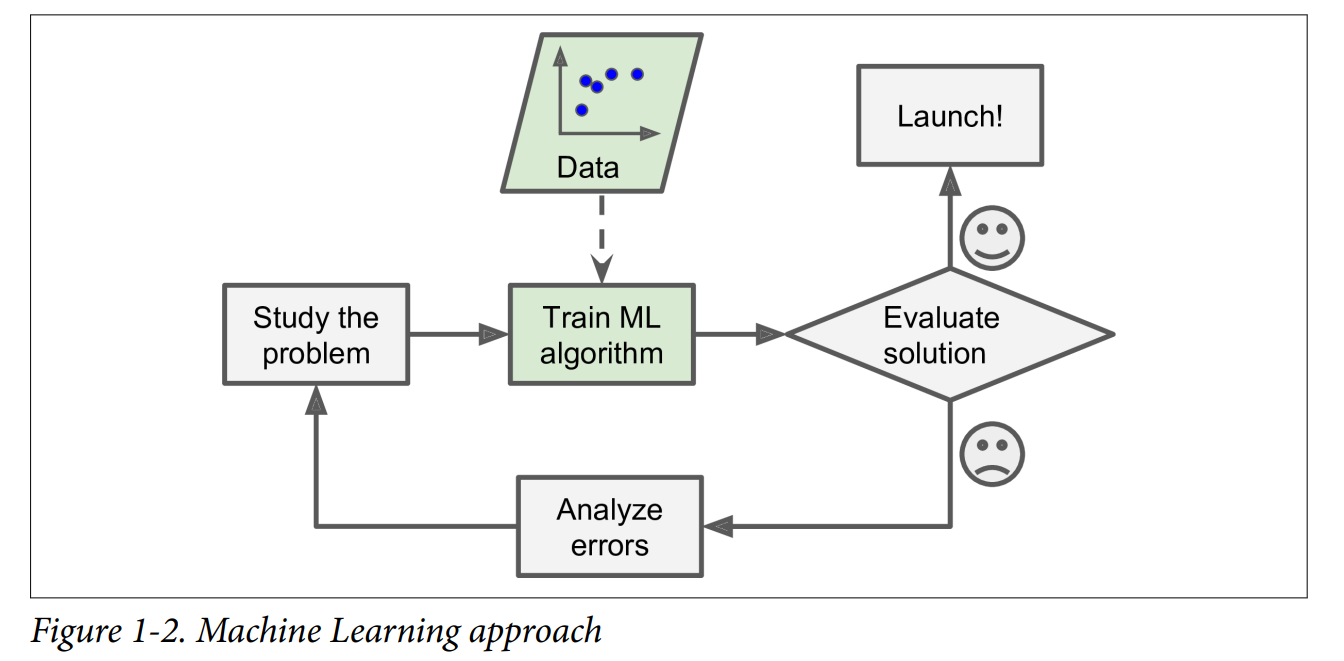
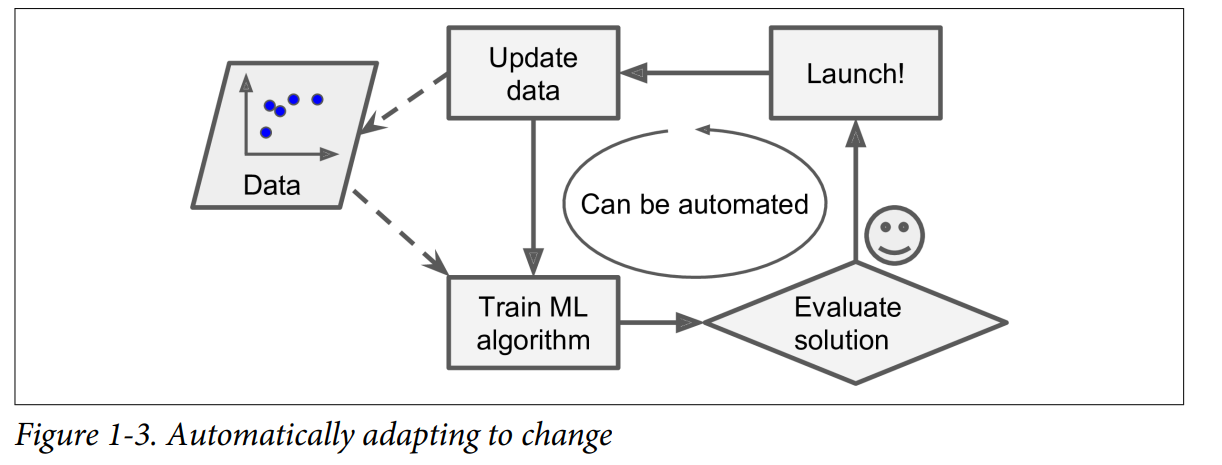

### Use Case 3: Speech Recognition

Traditional approach fails with variability (different accents, noise, languages).

ML can learn to recognize words from audio data.

Scales well to complex, real-world speech recognition tasks.


### Use Case 4: Helping Humans Learn (Data Mining)

ML models can reveal what features are most predictive.

Useful for discovering patterns, trends, and correlations in data.

Helps deepen understanding of the problem.

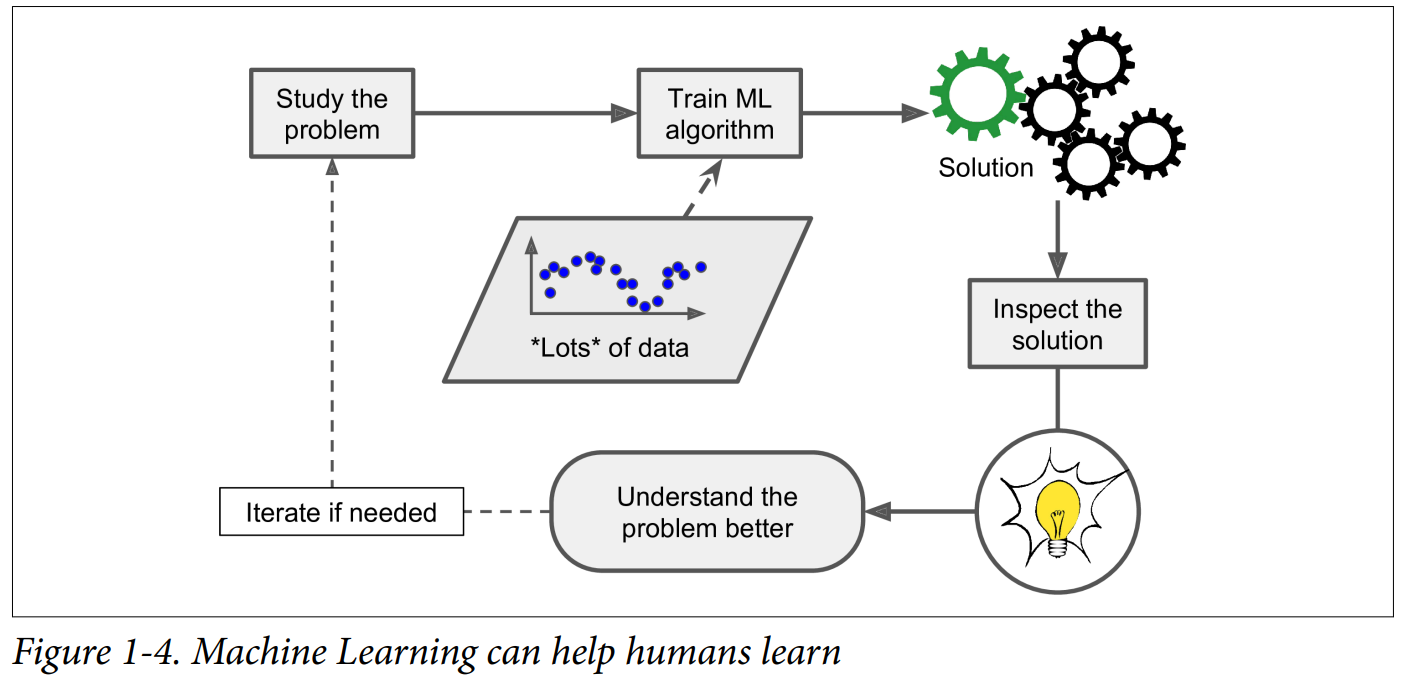
Summary Use Cases

Replace complex hand-tuned rule systems.

Solve problems with no traditional algorithm.

Adapt to changing environments.

Extract insights from large/complex datasets.

## Assume below scnario, and observation data

In [12]:
import numpy as np

# Data for regression: [distance, traffic_level (0=light, 1=moderate, 2=heavy)]
X_regression = np.array([[5, 0], [10, 1], [15, 2], [20, 0], [25, 1]])
y_regression = np.array([5, 15, 30, 20, 37.5])  # travel times

# Data for classification: [fever, cough, headache, stomach pain] (1=present, 0=absent)
X_classification = np.array([[1, 1, 0, 0], [0, 0, 1, 1], [1, 0, 0, 0]])
y_classification = np.array(['Flu', 'Headache', 'Unknown'])  # diagnoses

## Example 1: Regression - Estimating Travel Time

The goal is to estimate the travel time based on distance and traffic conditions of the above observational data

### <b> <font color=green> Traditional Programming Approach </font> </b>

In [14]:
def estimate_travel_time(distance, traffic):
    if traffic == 'heavy':
        return distance * 2  # Assume heavy traffic doubles the time
    elif traffic == 'moderate':
        return distance * 1.5  # Moderate traffic increases time by 50%
    else:
        return distance  # Light traffic assumes 1 unit time per distance

In [15]:
# Example usage
distance = 10  # in km
traffic = 'moderate'
print(f"Estimated Travel Time: {estimate_travel_time(distance, traffic)} minutes")

Estimated Travel Time: 15.0 minutes


### <b> <font color=green> Machine Learning Approach </font> </b>

In [17]:
from sklearn.linear_model import LinearRegression

# Train ML model
model = LinearRegression()
model.fit(X_regression, y_regression)

LinearRegression()

In [18]:
# Predict travel time
test_data = np.array([[10, 1]])  # Distance=10, Traffic=moderate
predicted_time = model.predict(test_data)[0]
print(f"Predicted Travel Time: {predicted_time:.2f} minutes")

Predicted Travel Time: 16.67 minutes


## Example 2: Classification - Medical Diagnosis

The goal is to classify whether a patient has a disease based on symptoms using both paradigms.

### <b> <font color=green> Traditional Programming Approach </font> </b>

In [19]:
def diagnose(symptoms):
    if 'fever' in symptoms and 'cough' in symptoms:
        return 'Flu'
    elif 'headache' in symptoms and 'stomach pain' in symptoms:
        return 'Headache'
    else:
        return 'Unknown'

In [20]:
# Example usage
symptoms = ['fever', 'cough']
print(f"Diagnosis: {diagnose(symptoms)}")

Diagnosis: Flu


### <b> <font color=green> Machine Learning Approach </font> </b>

In [22]:
from sklearn.tree import DecisionTreeClassifier

# Train model
model = DecisionTreeClassifier()
model.fit(X_classification, y_classification)

DecisionTreeClassifier()

In [23]:
# Predict diagnosis
test_data = np.array([[1, 1, 0, 0]])  # Fever and cough
predicted_diagnosis = model.predict(test_data)[0]
print(f"Predicted Diagnosis: {predicted_diagnosis}")

Predicted Diagnosis: Flu


## Example 3: Image-Based Tasks (Complex Task)

The goal is to identify simple pattrens in an image.

In [24]:
# Define the data for both paradigms
import matplotlib.pyplot as plt

# A simple 5x5 grid image where 1 represents a filled pixel and 0 represents an empty pixel
horizontal_line_image = [
    [0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1],  # Horizontal line
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0]
]

vertical_line_image = [
    [0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0]
]

# Labels for Machine Learning: 0 = No line, 1 = Horizontal line, 2 = Vertical line
X = [
    [0, 0, 0, 0, 0, 1],  # No line
    [1, 1, 1, 1, 1, 1],  # Horizontal line
    [0, 0, 0, 0, 0, 0],  # No line
    [0, 1, 0, 0, 0, 2]   # Vertical line
]
y = [0, 1, 0, 2]  # Labels

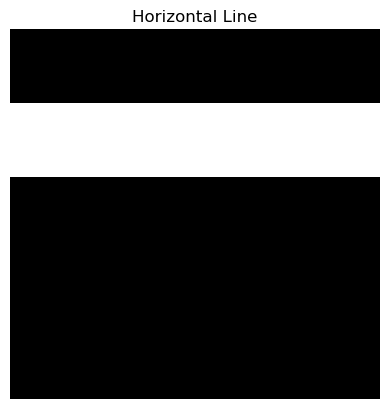

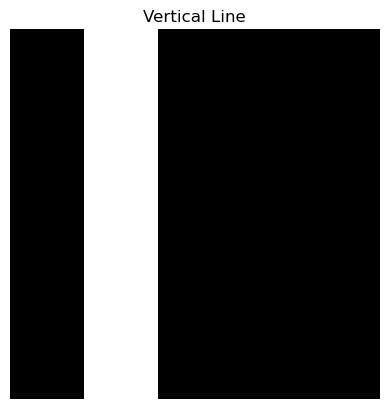

In [26]:
# Visualize the synthatic images
def visualize_image(image, title):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Display horizontal and vertical line images
visualize_image(horizontal_line_image, 'Horizontal Line')
visualize_image(vertical_line_image, 'Vertical Line')

### <b> <font color=green> Traditional Programming Approach </font> </b>

Consider a simple 5x5 grid image where `1` represents a filled pixel and `0` represents an empty pixel. The task is to identify whether the image contains a horizontal or vertical line.

In [28]:
def contains_horizontal_line(image):
    for row in image:
        if all(pixel == 1 for pixel in row):
            return True
    return False

def contains_vertical_line(image):
    for col in range(len(image[0])):
        if all(row[col] == 1 for row in image):
            return True
    return False

In [29]:
# Example usage
print(f"Contains Horizontal Line: {contains_horizontal_line(horizontal_line_image)}")
print(f"Contains Vertical Line: {contains_vertical_line(vertical_line_image)}")

Contains Horizontal Line: True
Contains Vertical Line: True


### <b> <font color=green> Machine Learning Approach </font> </b>

Using a simple Machine Learning model ti train to  recognize patterns in the images

In [30]:
from sklearn.linear_model import LogisticRegression

# Train model
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [ ]:
# Predict 1
test_image = [[0, 1, 0, 0, 0, 2]]  # Vertical line
prediction = model.predict(test_image)[0]
print(f"Predicted: {'Horizontal Line' if prediction == 1 else 'Vertical Line' if prediction == 2 else 'No Line'}")

Predicted: Vertical Line


In [33]:
# Predict 2
test_image = [[1, 1, 1, 1, 1, 1]]  # Vertical line
prediction = model.predict(test_image)[0]
print(f"Predicted: {'Horizontal Line' if prediction == 1 else 'Vertical Line' if prediction == 2 else 'No Line'}")

Predicted: Horizontal Line


### <span style="color:blue">What I noticed in Traditional Programming Approach:</span>
<span style="color:navy">- We must manually set rules in a function of conditional statement (usually if-statement)</span>  
<span style="color:navy">- Before creating the logic of the conditional statement function, assumptions must be predefined.</span>  
<span style="color:navy">- As the function is hard-coded, it needs to be updated every time new cases are recognized; it cannot adapt to new patterns on its own.</span>  
<span style="color:navy">- No matter how much past data it has, it cannot learn from it; it must be manually updated.</span>  
<span style="color:navy">- It can only handle fixed, straightforward scenarios with clearly defined rules.</span>


### <span style="color:blue">What I noticed in Machine Learning Approach:</span>
<span style="color:navy">- No need to manually write rules with conditional statements, actually the ML model learns the logic from the past data on its own.</span>  
<span style="color:navy">- No predefined assumptions are needed because the model detects patterns on its own.</span>  
<span style="color:navy">- No need to hard code everything, the model can automatically adapt to new patterns if retrained with new data.</span>  
<span style="color:navy">- The model needs to be told what are the features (input) and what are the labels (output).</span>


## Termenology (in my own words an way of thinking):


<style>
  h1, h2, h3 {
    color: blue;
  }
  p, li, em {
    color: navy;
  }
</style>

<h1>What I Understand About Machine Learning (ML)</h1>
<p>Based on the differences I noticed between traditional programming approach and ML approach:<br>
Machine Learning is a technique that takes given data as input, learns patterns and trends from it, and later becomes able to make predictions or decisions on new data.</p>

<p>Like in the example of estimating travel time, where the ML model learned from past data with distance and traffic levels to predict travel time for new cases without manually coding rules for each traffic condition.</p>

<hr>

<h2>How ML Works</h2>
<p>The machine “learns” through a <strong>model</strong>.</p>

<p>A machine learning model is an algorithm trained on data to detect relationships and make predictions.</p>

<p>For example, in estimating travel time, a Linear Regression model is trained on past data like distance and traffic level to predict travel time.</p>

<pre><code>model = LinearRegression()    # This creates the Linear Regression model
model.fit(X_regression, y_regression)    # This trains the model on the given data
</code></pre>

<ul>
  <li><code>LinearRegression()</code> initializes the model.</li>
  <li><code>.fit()</code> trains the model by finding the best fit line that relates inputs (<code>X_regression</code>) to outputs (<code>y_regression</code>).</li>
  <li>So, the actual Linear Regression happens when you call <code>model.fit()</code>.</li>
</ul>

<hr>

<h2>Types of ML Models I’ve Learned So Far</h2>
<p>I've understood that an ML model can be either a <strong>regression model</strong> or a <strong>classification model</strong>.</p>

<p><strong>Regression Model</strong><br>
A regression model is used when the output is continuous (like a number).<br>
Example: Predicting travel time based on distance and traffic.</p>

<p><strong>Classification Model</strong><br>
A classification model is used when the output is a category or label.<br>
Example: Predicting whether a person has Flu, Headache, or Unknown based on symptoms.</p>

<hr>

<h2>Generalization</h2>
<p>Generalization is another name for "learning to perform well on new, unknown data."</p>

<p>It means the model isn't just memorizing the training data; it actually understands the patterns so it can work on new, similar data too.</p>

<hr>

<h2>ML Learns in Different Ways Regarding the Given Data</h2>

<h3>Supervised Learning</h3>
<p>ML learns from labeled data (data with known outputs).<br>
<strong>Given:</strong> data + output<br>
<strong>How?</strong> Examples of data are given with correct results, and the model uses them to predict new cases.<br>
<em>Like teaching a child the shape of a circle and its name so next time they recognize new circles.</em></p>

<h3>Unsupervised Learning</h3>
<p>ML finds patterns without labels.<br>
<strong>Given:</strong> data only<br>
<strong>How?</strong> Only examples without answers are given, so the model finds patterns by itself.<br>
<em>This kinda reminds me of me solving the nonverbal puzzles, figuring out patterns without explaining or naming them.</em></p>

<h3>Semi-Supervised Learning</h3>
<p>ML uses a small amount of labeled data and a large amount of unlabeled data.<br>
<strong>Given:</strong> data + few outputs<br>
<strong>How?</strong> The model mostly learns from examples without answers, but a few labeled ones help guide it.<br>
<em>Like getting hints in a video game at the beginning, then figuring out the rest on your own.</em></p>

<p><strong>Both regression and classification are supervised learning tasks.</strong></p>

<hr>

<h2>Core Components of Machine Learning</h2>
<ul>
  <li><strong>The Data:</strong> What we give to the model (features + labels, if supervised).</li>
  <li><strong>The Model:</strong> The algorithm that learns from the data.</li>
  <li><strong>The Loss:</strong> A number that shows how far the model's prediction is from the actual output.<br>Also known as error, cost, or MSE (mean squared error).</li>
</ul>

<p>We use optimization methods (like gradient descent) to minimize the loss.</p>

<hr>

<h2>Training the Model: Step-by-Step</h2>
<ol>
  <li>Takes the input data (features).<br>
  <em>Example: The ML model gets input like distance and traffic level (<code>X_regression</code>).</em></li>

  <li>Makes predictions based on the current state.<br>
  <em>Example: The linear regression model predicts travel time for given distance and traffic.</em></li>

  <li>Compares its predictions to the actual answers (labels) and calculates the loss (error).<br>
  <em>Example: It checks how far predicted travel time is from actual travel times in <code>y_regression</code>.</em></li>

  <li>Uses optimization methods (like gradient descent) to adjust itself and reduce the loss.<br>
  <em>Example: The regression model updates its coefficients to better fit the travel time data.</em></li>

  <li>Repeats steps 2–4 many times until it learns to make accurate predictions.<br>
  <em>Example: The model runs through the travel data multiple times during <code>.fit()</code> to improve predictions.</em></li>
</ol>

<hr>

<h2>ML Can Be Unreliable If:</h2>
<ul>
  <li><strong>Data quantity or quality is not enough</strong><br>
  <em>Example: If we only had 2 or 3 travel time records instead of 5, the model wouldn’t learn reliable patterns.</em></li>

  <li><strong>Data is nonrepresentative</strong><br>
  <em>Example: If all travel data was collected only during light traffic, the model won’t predict well for heavy traffic.</em></li>

  <li><strong>The model underfits (too simple to learn)</strong><br>
  <em>Example: Using a rule like “travel time = distance” ignores traffic effects, so predictions are poor.</em></li>

  <li><strong>The model overfits (memorizes data instead of generalizing)</strong><br>
  <em>Example: If the model just memorizes exact travel times for the training distances and traffic, it fails to predict new combinations accurately.</em></li>
</ul>

<hr>

<h2>ML Lifecycle</h2>
<ul>
  <li><strong>Data Pipeline Development:</strong> Data is being collected, cleaned, and prepared</li>
  <li><strong>Training:</strong> The model is being built and optimized on labeled data</li>
  <li><strong>Inference:</strong> The model is being used to make predictions on new data</li>
</ul>
